In [36]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

In [37]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

# Fig 3

In [7]:
df.rename(columns = dict(zip(['Citation_Count','C5','Patent_Count','Tweet_Count','nAtyp_10pct_Z_p','Disruption'],['C','C5','CP','CT','Novelty','Disruption'])), inplace = True)

In [8]:
df1 = df[df['NIH']==1].copy()
df2 = df[df['NSF']==1].copy()
df3 = df[(df['NIH']==0) & (df['NSF']==0)].copy()

In [9]:
df.columns

Index(['PaperID', 'Year', 'Reference_Count', 'C', 'C_f', 'C5', 'Team_Size',
       'Institution_Count', 'Country_Count', 'Disruption', 'Atyp_10pct_Z',
       'Atyp_Median_Z', 'nAtyp_10pct_Z', 'nAtyp_Median_Z', 'Novelty',
       'nAtyp_Median_Z_p', 'CP', 'Patent', 'Newsfeed_Count', 'Newsfeed', 'CT',
       'Tweet', 'NCT_Count', 'NCT', 'NIH_Count', 'NIH', 'NSF_Count', 'NSF',
       'PFemale', '#Page', 'Title Length', 'RaoStirling',
       'SimpsonInterdisciplinarity', 'ShannonInterdisciplinarity', 'AuthorID',
       'JournalID', 'FieldID', 'Fieldname', 'FieldID2', 'FieldNAME2',
       'H-index', 'Productivity'],
      dtype='object')

In [17]:
jlst = ['C','CP','Novelty','C5','CT','Disruption']

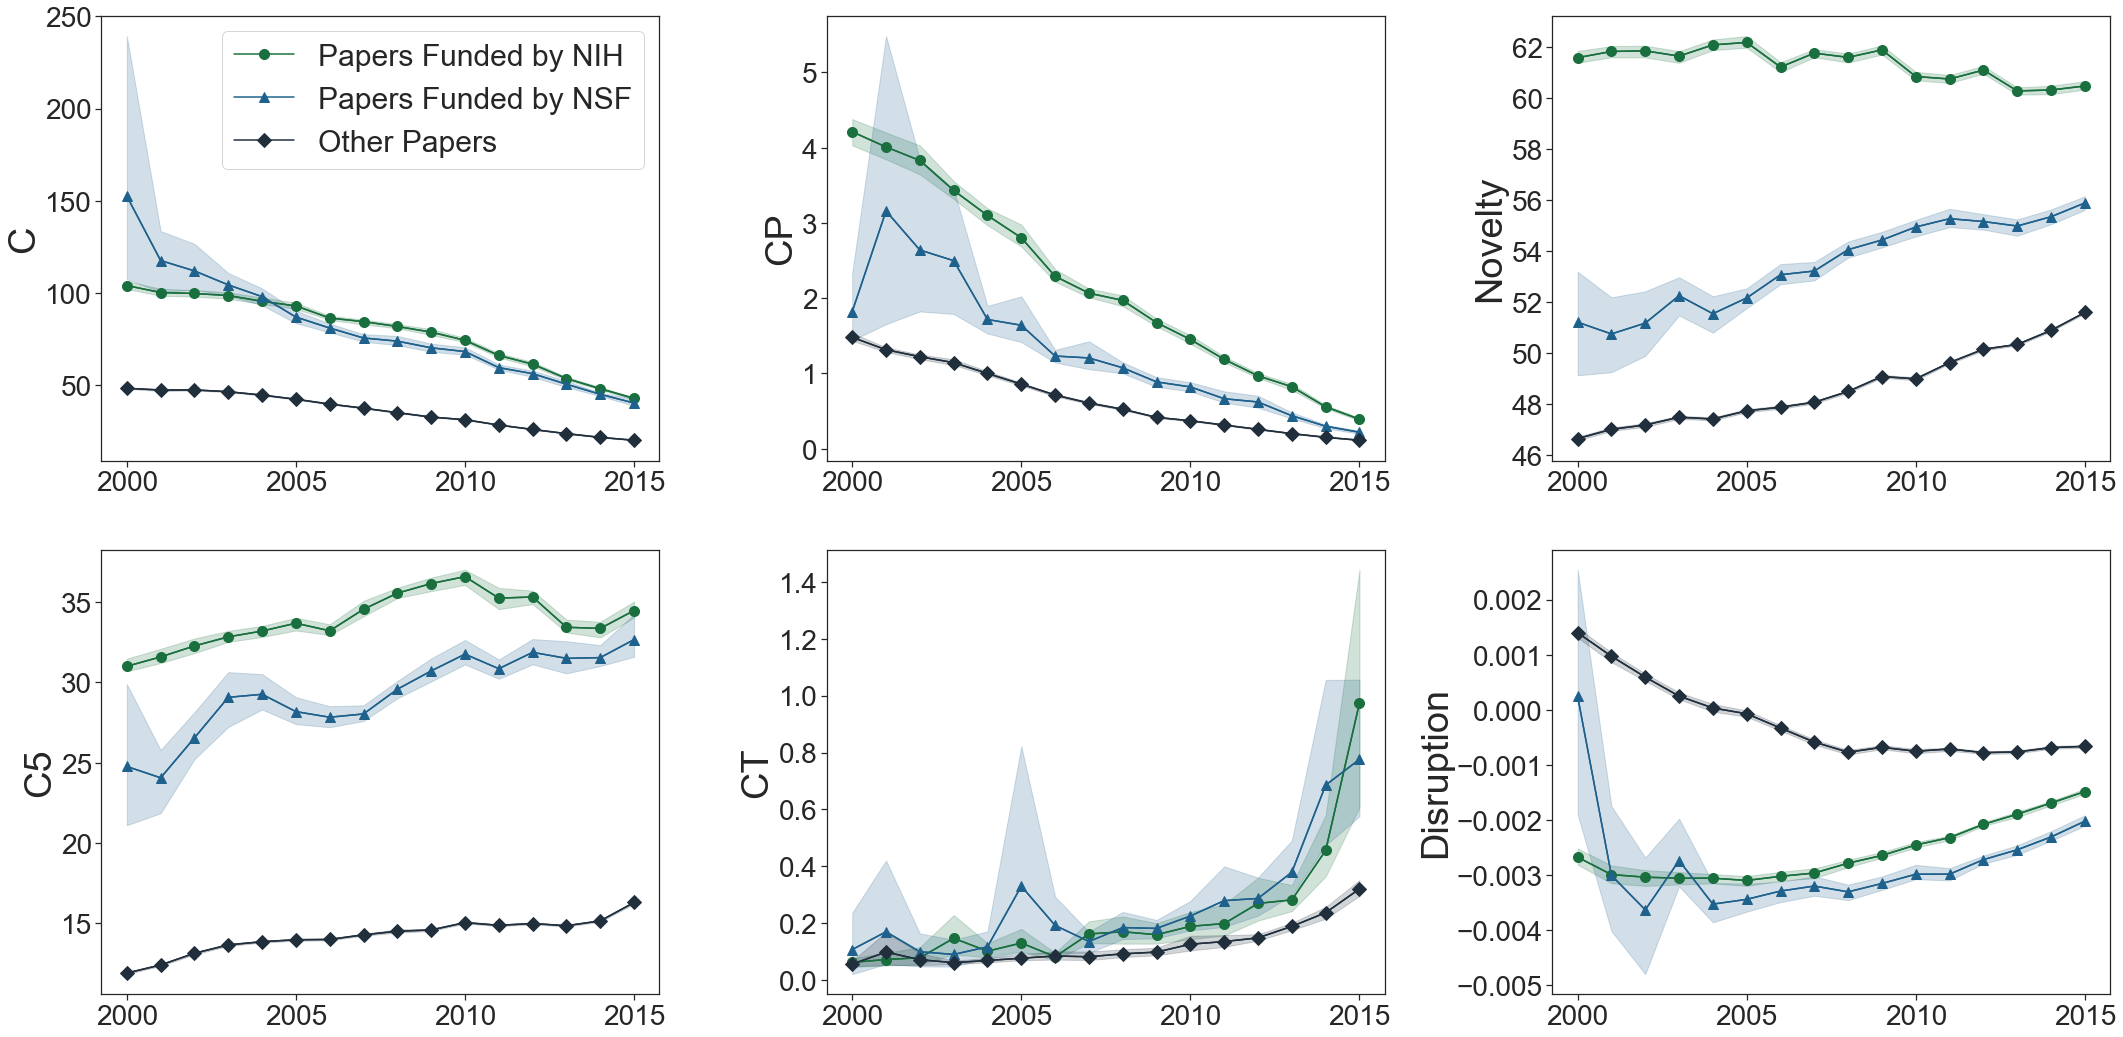

In [33]:
plt.subplots(2,3,figsize=(36,18))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.2)
sns.set_theme(style="ticks")

for j in range(6):
    ax = plt.subplot(2, 3, j+1)
    c = jlst[j]
    d1 = df1[c].groupby(df1['Year']).mean().reset_index()
    d2 = df2[c].groupby(df2['Year']).mean().reset_index()
    d3 = df3[c].groupby(df3['Year']).mean().reset_index()
    sns.lineplot(data=df1, x='Year', y=jlst[j],color = "#196F3D",n_boot=100)
    sns.lineplot(data=df2, x='Year', y=jlst[j],color = "#1F618D",n_boot=100)
    sns.lineplot(data=df3, x='Year', y=jlst[j],color = "#212F3D",n_boot=100)
    if j == 0:
        plt.plot(d1['Year'],d1[c],marker = 'o',markersize = 10,color="#196F3D",label='Papers Funded by NIH')
        plt.plot(d2['Year'],d2[c],marker = '^',markersize = 10,color="#1F618D",label='Papers Funded by NSF')
        plt.plot(d3['Year'],d3[c],marker = 'D',markersize = 10,color="#212F3D",label='Other Papers' )
        plt.legend(fontsize = 30 )
    else:
        plt.plot(d1['Year'],d1[c],marker = 'o',markersize = 10,color="#196F3D" )
        plt.plot(d2['Year'],d2[c],marker = '^',markersize = 10,color="#1F618D" )
        plt.plot(d3['Year'],d3[c],marker = 'D',markersize = 10,color="#212F3D" )

    plt.yticks(size = 28)
    plt.xticks([2000,2005,2010,2015],size = 28)
    plt.xlabel('',fontsize = 0)
    plt.ylabel(jlst[j],fontsize = 38)

# B

In [35]:
x = [i for i in range(19*4)]
x1 = x[: :4]
x2 = x[1: :4]

In [78]:
def get_d(v , df):
    dlst1 = []
    dlst2 = []
    dlst3 = []

    plst1 = []
    plst2 = []
    for i in range(19):
        fieldid = dfField['FieldID'].values[i]
        d1 = df1.loc[df1['FieldID'] == fieldid, v]
        dlst1.append(d1.mean())

        d2 = df2.loc[df2['FieldID'] == fieldid, v]
        dlst2.append(d2.mean())

        d3 = df3.loc[df3['FieldID'] == fieldid, v]
        dlst3.append(d3.mean())

        plst1.append(scipy.stats.mannwhitneyu(d1 , d3, alternative='two-sided')[-1])
        plst2.append(scipy.stats.mannwhitneyu(d2 , d3, alternative='two-sided')[-1])

    xticks = []
    m = 0
    for i in x:
        if i%4 == 1:
            xticks.append(dfField['Field_Name'].values[m])
            m += 1
        else:
            xticks.append('')
    return dlst1  , dlst2  , dlst3  , plst1 , plst2, xticks

In [84]:
def getstar(x):
    if x<0.01:
        return '***'
    elif x<0.05:
        return '**'
    elif x<0.1:
        return '*'
    else:
        return 'N'

In [79]:
vlst = ['C','C5','CP','CT','Novelty','Disruption']

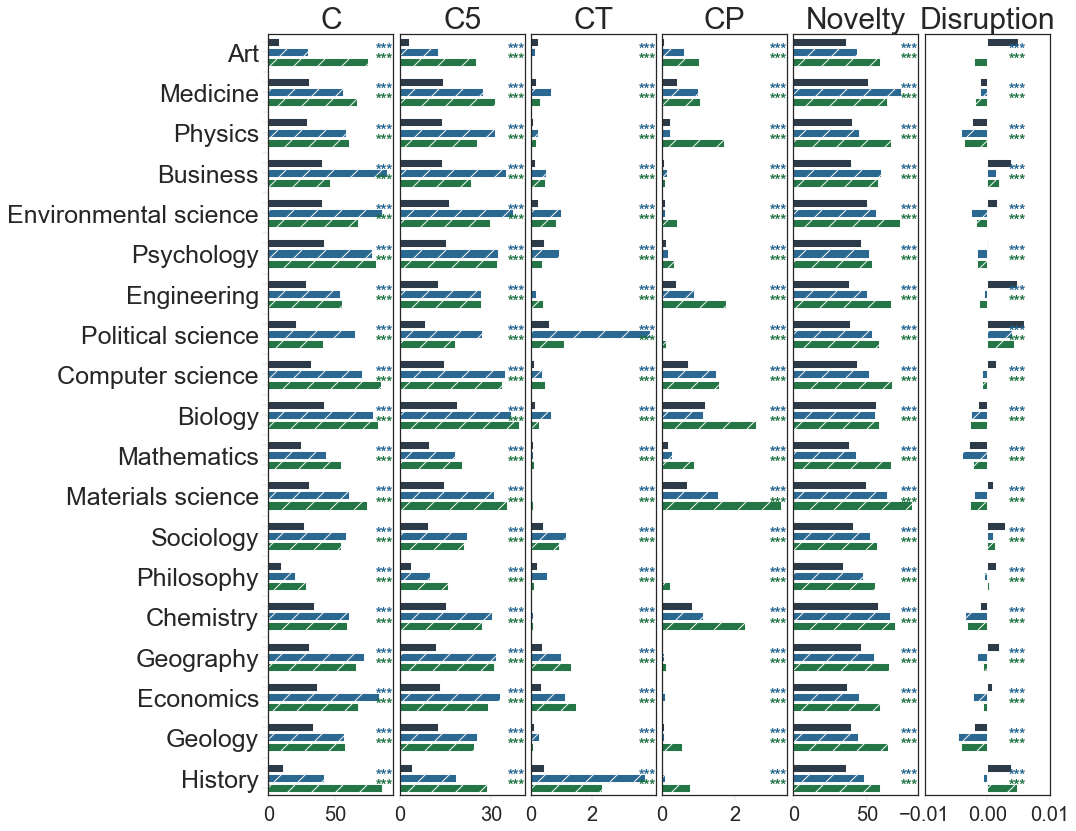

In [88]:
plt.subplots(1,6,figsize=(14,14))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.05)

for i in range(6):
    v = vlst[i]
    dlst1  , dlst2  , dlst3  , plst1 , plst2, xticks = get_d(v , df)

    ax = plt.subplot(1,6,i+ 1)

    plt.barh(x1, dlst1,color = '#196F3D',alpha = 0.95,hatch = '/')
    plt.barh(x2, dlst2,color = '#1F618D',alpha = 0.95,hatch = '/')
    plt.barh(x3, dlst3,color = '#212F3D',alpha = 0.95)
    for _ in range(19):
        p1 = p1lst[_]
        p2 = p2lst[_]
        t1 = getstar(p1)
        t2 = getstar(p2)
        text = ax.text(max(dlst1 + dlst2 + dlst3)*1.05, _*4+0.3, t1,
                               ha="right", va="center", color="#196F3D", fontsize=15, fontweight='bold')
        text = ax.text(max(dlst1 + dlst2 + dlst3)*1.05, _*4+1.3, t2,
                               ha="right", va="center", color="#1F618D", fontsize=15, fontweight='bold')
    if i == 0:
        plt.yticks(x , xticks, fontsize = 25)
    else:
        plt.yticks([])
        
    if i==0 or i==4:
        plt.xticks([0,50],size = 20)
    elif i==1:
        plt.xticks([0,30],size = 20)
    elif i==2 or i ==3:
        plt.xticks([0,2],size = 20)
    else:
        plt.xticks([-0.01,0,0.01],size = 20)
    plt.ylim((-0.75,len(x)-1.25))
    plt.tick_params(width=.1)
    
    plt.title(v,fontsize = 30)